<a href="https://colab.research.google.com/github/chandan725/Binary-Classification-model-for-Cancer-Dataset/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification**

# **Module Import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics

# **Loading of Dataset**

Link for Datasets:
[Click here!](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [3]:
cancer_dataset = datasets.load_breast_cancer()

In [4]:
print(cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
print(cancer_dataset.data[:2])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]


In [7]:
print(cancer_dataset.target[:2])

[0 0]


In [8]:
print('Feature name: \n', cancer_dataset.feature_names)
print()
print('Target name: ', cancer_dataset.target_names)

Feature name: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target name:  ['malignant' 'benign']


In [9]:
df = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Exploratory Data Analysis

In [10]:
df.shape

(569, 30)

In [11]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Coorelation Check for Feature Matrix

In [14]:
corr = df.corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


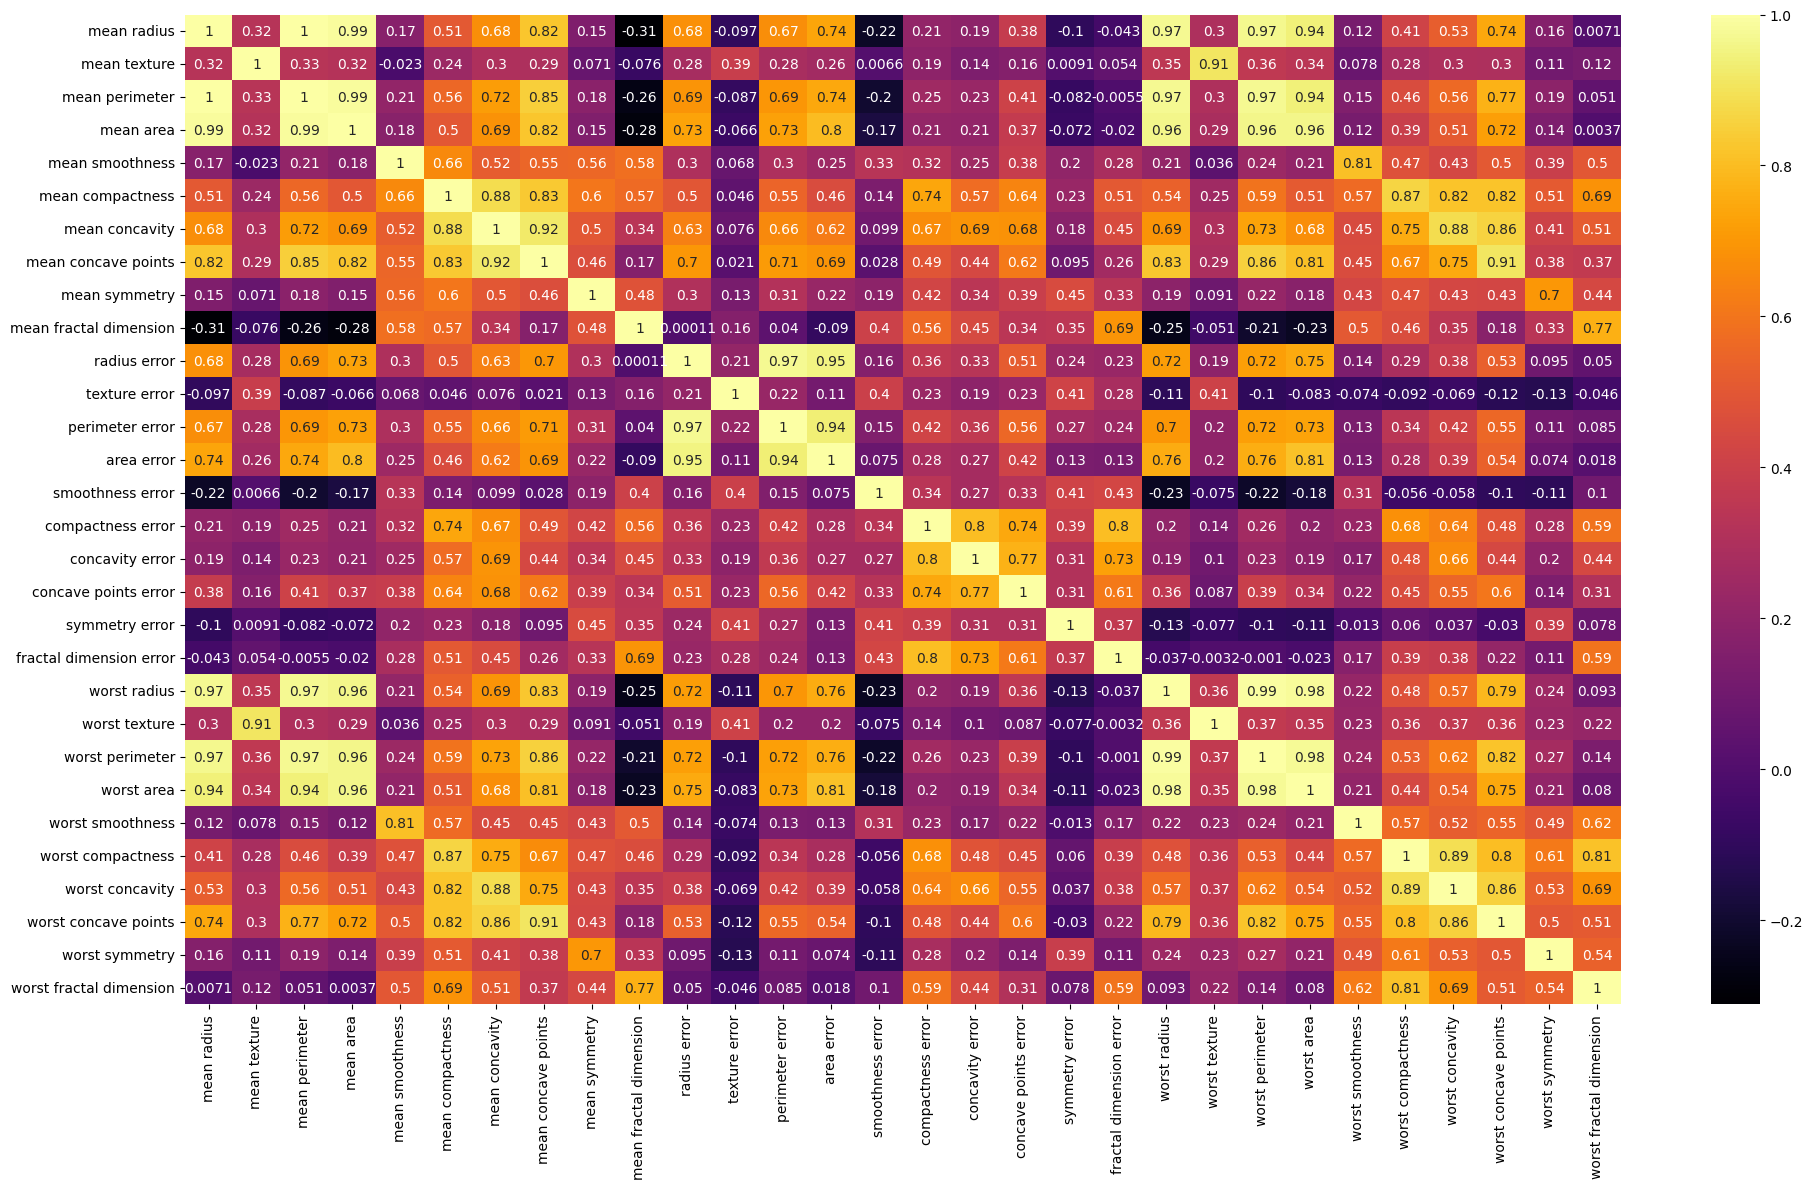

In [15]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='inferno')

plt.tight_layout()
plt.show()

In [16]:
# list of highly correlated features

highly_corr_columns = ['worst area', 'worst perimeter', 'worst radius', 'mean concave points', 'mean area',
                       'mean perimeter', 'worst texture', 'worst smoothness', 'worst concave points',
                       'worst concavity', 'worst compactness', 'mean concavity', 'area error',
                       'perimeter error', 'fractal dimension error', 'concavity error',
                       'worst fractal dimension']

In [17]:
df.shape

(569, 30)

In [18]:
# dropping off those highly correlated columns

df1 = df.drop(highly_corr_columns, axis=1)
df1.shape

(569, 13)

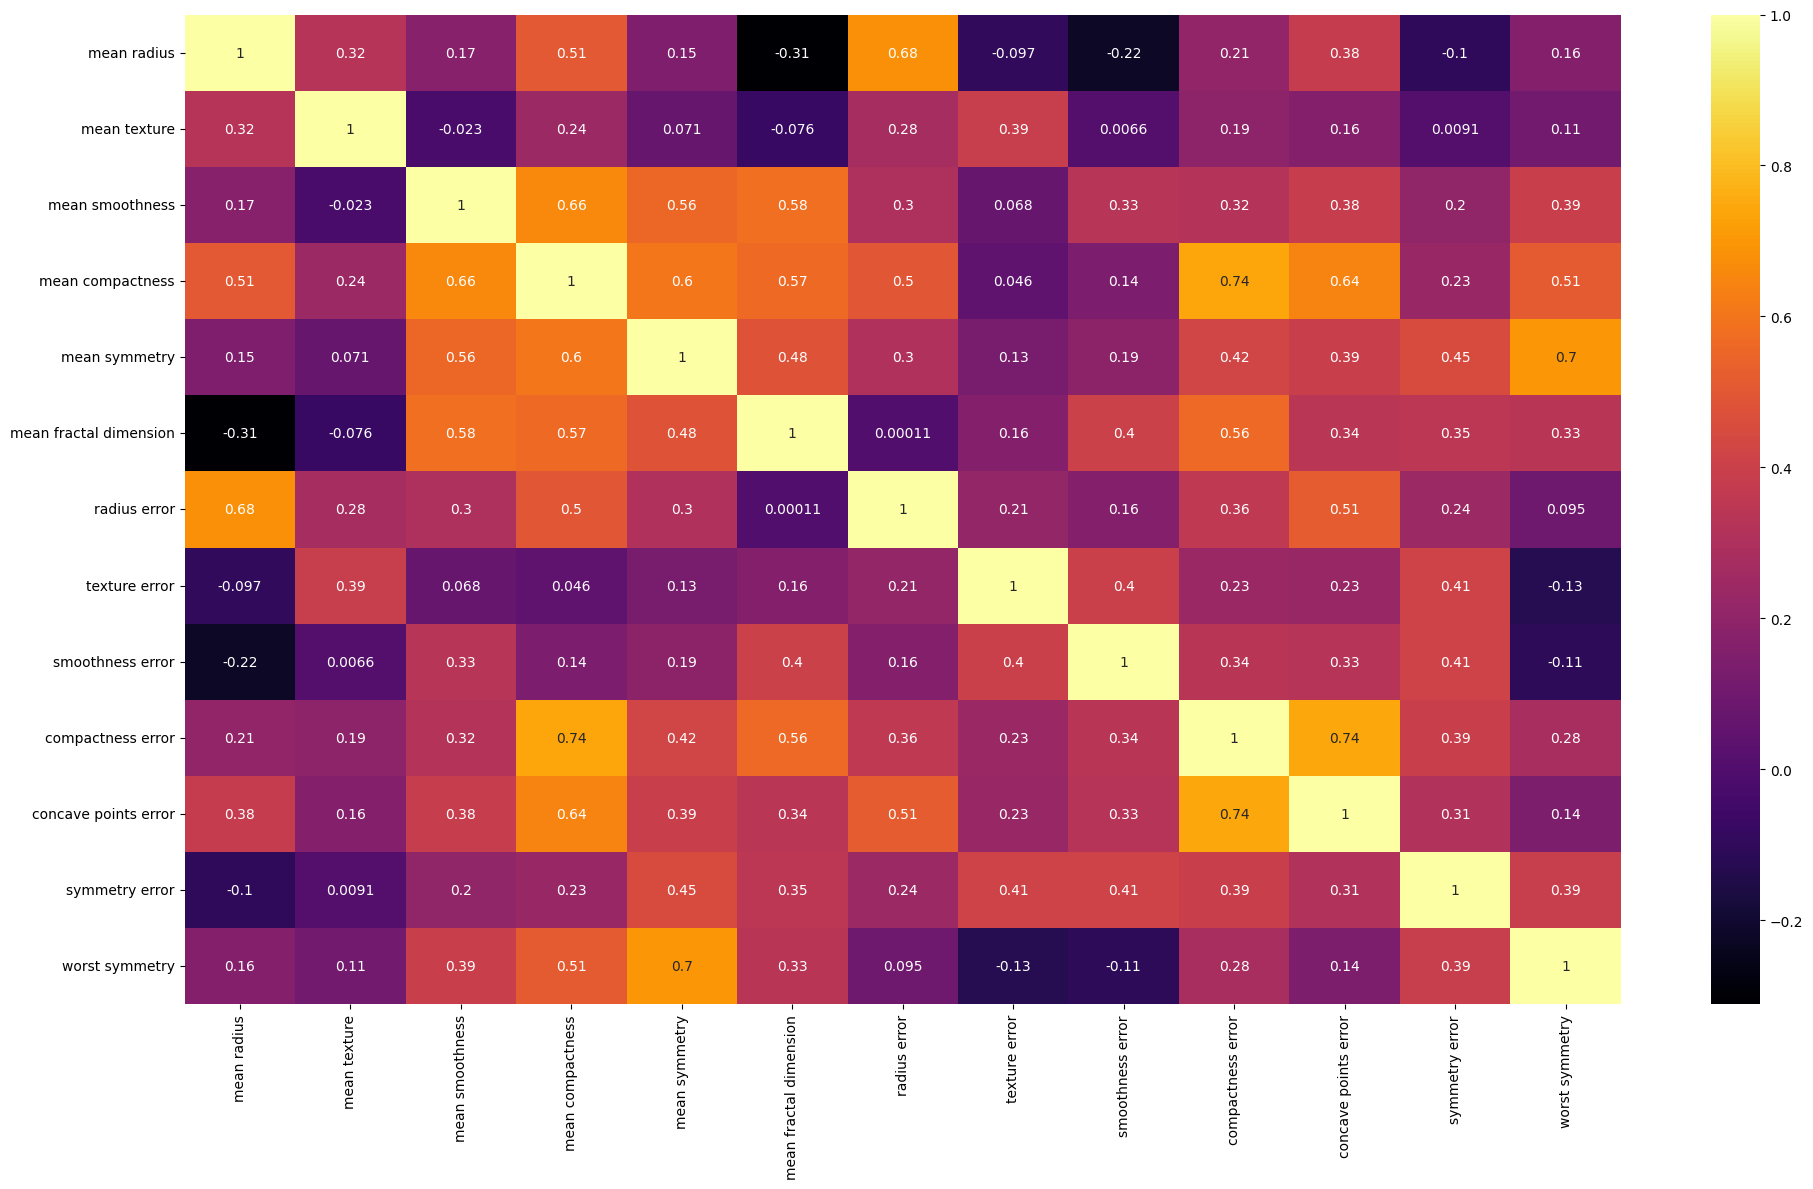

In [19]:
plt.figure(figsize=(20, 12))
sns.heatmap(df1.corr(), annot=True, cmap='inferno')

plt.tight_layout()
plt.show()

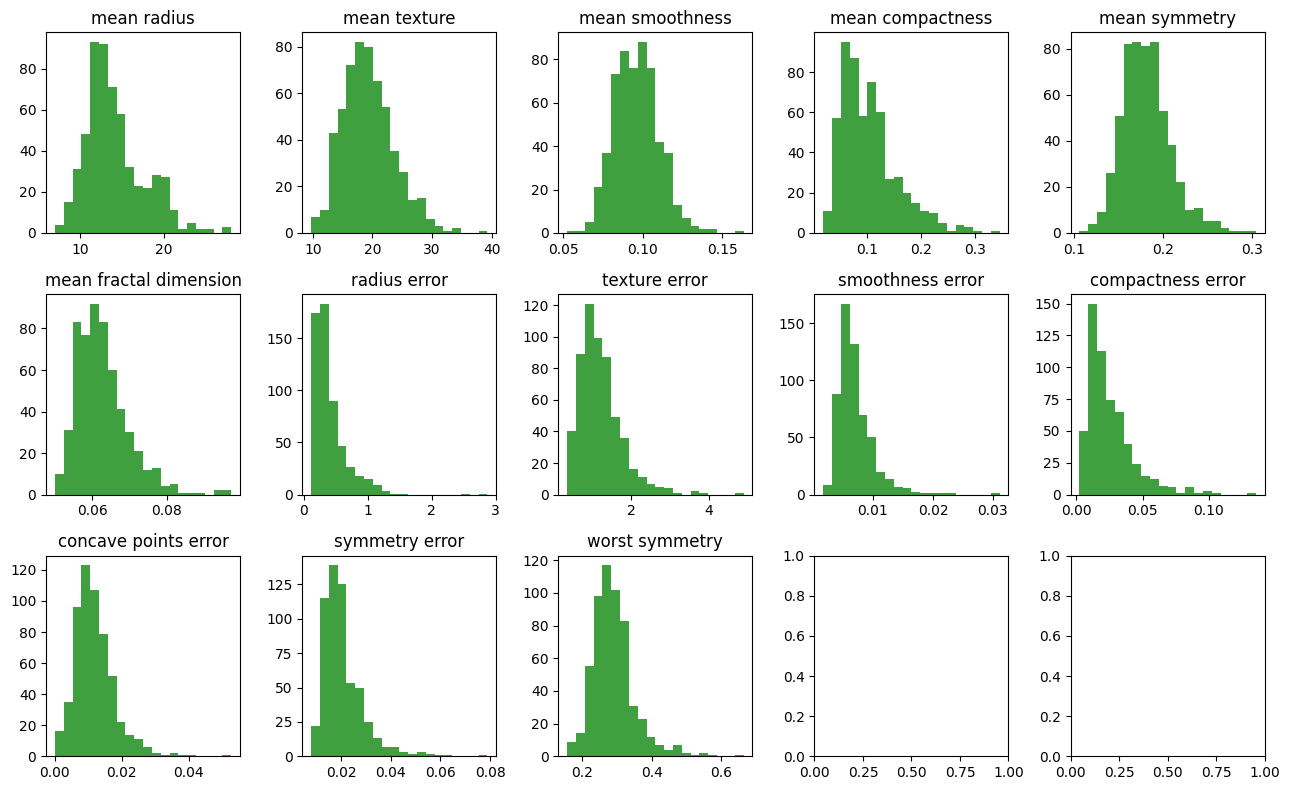

In [20]:
row=3
col=5

fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(13, 8))

k=0
for i in range(row):
  for j in range(col):
    if k==13:
      break
    else:
      ax[i, j].set_title(df1.columns[k])
      ax[i, j].hist(df1[df1.columns[k]], bins=20, color='green', alpha=0.75)
      k += 1



plt.tight_layout()
plt.show()

# **Classification Model**

In [21]:
df1['label'] = cancer_dataset.target

In [22]:
df1.head(3)

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry,label
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613,0


In [23]:
df1['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

## Preparation of Feature Matrix & Target Column

In [24]:
X = df1.drop('label', axis=1)
y= df1['label']

print('Shape of Feature Matrix: ', X.shape)
print('Shape of Target Column: ', y.shape)

Shape of Feature Matrix:  (569, 13)
Shape of Target Column:  (569,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [26]:
print('Feature training data: ', X_train.shape)
print('Target training data: ', y_train.shape)
print()
print('Feature testing data: ', X_test.shape)
print('Target testing data: ', y_test.shape)

Feature training data:  (455, 13)
Target training data:  (455,)

Feature testing data:  (114, 13)
Target testing data:  (114,)


In [27]:
class_label, label_count = np.unique(y_train, return_counts=True)
print(class_label)
print(label_count)

[0 1]
[170 285]


In [28]:
class_label_wise_count = {label: count for (label, count) in zip(class_label, label_count)}
class_label_wise_count

{0: 170, 1: 285}

## Classification Model Pipeline

In [29]:
pipeline = Pipeline([('scale', MinMaxScaler()),
                     ('classifier', SVC())])

In [30]:
pipeline.get_params()

{'memory': None,
 'steps': [('scale', MinMaxScaler()), ('classifier', SVC())],
 'verbose': False,
 'scale': MinMaxScaler(),
 'classifier': SVC(),
 'scale__clip': False,
 'scale__copy': True,
 'scale__feature_range': (0, 1),
 'classifier__C': 1.0,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 3,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'rbf',
 'classifier__max_iter': -1,
 'classifier__probability': False,
 'classifier__random_state': None,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

## Model Hyperparameter & GridSearch CV

In [31]:
parameter = {
    'classifier__C': [1, 5, 10, 15, 20],
    'classifier__degree': [2, 3, 4],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [32]:
classifier = GridSearchCV(estimator=pipeline, param_grid=parameter, cv=3)
classifier

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [1, 5, 10, 15, 20],
                         'classifier__degree': [2, 3, 4],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']})

In [33]:
classifier.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [1, 5, 10, 15, 20],
                         'classifier__degree': [2, 3, 4],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']})

In [34]:
print(classifier.cv_results_)

{'mean_fit_time': array([0.01920168, 0.02234753, 0.02191138, 0.01853712, 0.00862209,
       0.01082389, 0.0113616 , 0.01519489, 0.00875314, 0.01381413,
       0.00952681, 0.01502283, 0.01515039, 0.01041238, 0.01241565,
       0.01882148, 0.00938543, 0.01732524, 0.01859236, 0.02390424,
       0.01436241, 0.01865554, 0.00916759, 0.01617773, 0.01607966,
       0.01489377, 0.00929634, 0.02188683, 0.01176786, 0.02142191,
       0.012851  , 0.02337718, 0.01046419, 0.01830761, 0.00903606,
       0.02525568, 0.00818165, 0.0103031 , 0.00970451, 0.02639143,
       0.00875227, 0.01763113, 0.00895   , 0.01295066, 0.01432157,
       0.01501131, 0.00970229, 0.01642148, 0.01079098, 0.02096971,
       0.01580151, 0.0154051 , 0.00865587, 0.02049001, 0.01809033,
       0.01449267, 0.00932217, 0.02739223, 0.01477838, 0.02403235]), 'std_fit_time': array([0.00507836, 0.00264007, 0.0147486 , 0.00365047, 0.00026431,
       0.00190025, 0.00223871, 0.00058065, 0.0001943 , 0.0044731 ,
       0.0004752 , 0.00028

In [35]:
result_df = pd.DataFrame(classifier.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__degree,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019202,0.005078,0.004089,0.000615,1,2,linear,"{'classifier__C': 1, 'classifier__degree': 2, ...",0.907895,0.960526,0.960265,0.942895,0.024749,17
1,0.022348,0.002640,0.006017,0.002968,1,2,poly,"{'classifier__C': 1, 'classifier__degree': 2, ...",0.914474,0.953947,0.966887,0.945103,0.022293,13
2,0.021911,0.014749,0.006103,0.000845,1,2,rbf,"{'classifier__C': 1, 'classifier__degree': 2, ...",0.907895,0.947368,0.966887,0.940717,0.024539,20
3,0.018537,0.003650,0.007593,0.000329,1,2,sigmoid,"{'classifier__C': 1, 'classifier__degree': 2, ...",0.361842,0.342105,0.337748,0.347232,0.010483,46
4,0.008622,0.000264,0.005485,0.001410,1,3,linear,"{'classifier__C': 1, 'classifier__degree': 3, ...",0.907895,0.960526,0.960265,0.942895,0.024749,17
5,0.010824,0.001900,0.003637,0.000162,1,3,poly,"{'classifier__C': 1, 'classifier__degree': 3, ...",0.907895,0.927632,0.973510,0.936345,0.027487,24
6,0.011362,0.002239,0.005218,0.000038,1,3,rbf,"{'classifier__C': 1, 'classifier__degree': 3, ...",0.907895,0.947368,0.966887,0.940717,0.024539,20
7,0.015195,0.000581,0.008200,0.001235,1,3,sigmoid,"{'classifier__C': 1, 'classifier__degree': 3, ...",0.361842,0.342105,0.337748,0.347232,0.010483,46
8,0.008753,0.000194,0.004120,0.000124,1,4,linear,"{'classifier__C': 1, 'classifier__degree': 4, ...",0.907895,0.960526,0.960265,0.942895,0.024749,17
9,0.013814,0.004473,0.003858,0.000191,1,4,poly,"{'classifier__C': 1, 'classifier__degree': 4, ...",0.907895,0.921053,0.973510,0.934152,0.028344,30


In [36]:
print('Grid Search Parameter: \n', classifier.get_params())
print()
print('SVC Model Parameter: \n', classifier.param_grid)

Grid Search Parameter: 
 {'cv': 3, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('scale', MinMaxScaler()), ('classifier', SVC())], 'estimator__verbose': False, 'estimator__scale': MinMaxScaler(), 'estimator__classifier': SVC(), 'estimator__scale__clip': False, 'estimator__scale__copy': True, 'estimator__scale__feature_range': (0, 1), 'estimator__classifier__C': 1.0, 'estimator__classifier__break_ties': False, 'estimator__classifier__cache_size': 200, 'estimator__classifier__class_weight': None, 'estimator__classifier__coef0': 0.0, 'estimator__classifier__decision_function_shape': 'ovr', 'estimator__classifier__degree': 3, 'estimator__classifier__gamma': 'scale', 'estimator__classifier__kernel': 'rbf', 'estimator__classifier__max_iter': -1, 'estimator__classifier__probability': False, 'estimator__classifier__random_state': None, 'estimator__classifier__shrinking': True, 'estimator__classifier__tol': 0.001, 'estimator__classifier__verbose': False, 'estimator': Pipe

In [37]:
print('Best estimator: ', classifier.best_estimator_)
print()
print('Best value for corresponding parameter: ', classifier.best_params_)
print()
print('best model score: ', classifier.best_score_)

Best estimator:  Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier', SVC(C=5, degree=2, kernel='linear'))])

Best value for corresponding parameter:  {'classifier__C': 5, 'classifier__degree': 2, 'classifier__kernel': 'linear'}

best model score:  0.9626612059951203


## Model Prediction & Evaluation Metrics

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [40]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[40  2]
 [ 1 71]]


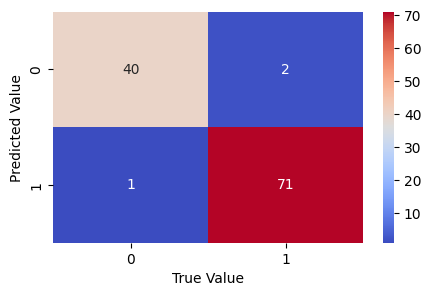

In [41]:
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [42]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

roc_auc

0.9692460317460316

In [43]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.04761905 1.        ]
[0.         0.98611111 1.        ]
[2 1 0]


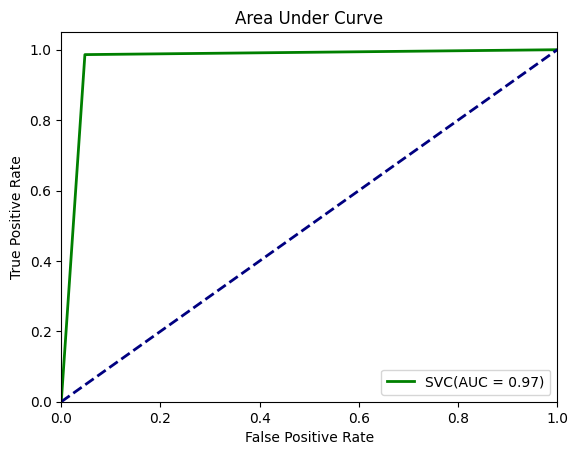

In [44]:
plt.plot(fpr, tpr, color='green', lw=2, label='SVC(AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()